#Importing Libraries and Data 

In [1]:
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statistics as st 
import math as m
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Graduation Project/Reema/Datasets/UC1/five-year-survival-rates-by-cancer-type.csv')
df

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999,17.1,23.4,10.8,21.2,NaN,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
3,Argentina,ARG,2004,75.5,52.0,46.0,NaN,NaN,20.8,26.8,85.0,44.4,19.2
4,Argentina,ARG,2009,76.6,50.6,40.6,90.0,24.2,11.9,29.7,86.6,31.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,United States,USA,1999,86.0,64.2,60.5,44.5,8.5,15.2,38.9,93.2,60.0,22.1
155,United States,USA,2004,87.9,63.6,63.7,48.8,11.9,16.6,39.6,96.4,63.1,25.8
156,United States,USA,2009,88.6,62.8,64.7,51.8,15.2,18.7,40.9,97.2,64.0,29.1
157,Uruguay,URY,2004,NaN,NaN,56.5,NaN,NaN,12.5,NaN,NaN,53.0,NaN


# Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     159 non-null    object 
 1   Code       159 non-null    object 
 2   Year       159 non-null    int64  
 3   Breast     156 non-null    float64
 4   Cervix     154 non-null    float64
 5   Colon      152 non-null    float64
 6   Leukaemia  144 non-null    float64
 7   Liver      141 non-null    float64
 8   Lung       153 non-null    float64
 9   Ovary      149 non-null    float64
 10  Prostate   150 non-null    float64
 11  Rectum     144 non-null    float64
 12  Stomach    151 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.3+ KB


In [5]:
df.Entity.nunique()

59

# Data Cleaning and Feature Engineering

### Splitting the data frame 

In [6]:
arab= df[(df['Entity']=='Algeria')|(df['Entity']=='Jordan') | (df['Entity']=='Qatar') | (df['Entity']=='Saudi Arabia') | (df['Entity']=='Tunisia')]
notarab=df[~ ((df['Entity']=='Algeria')|(df['Entity']=='Jordan') | (df['Entity']=='Qatar' )| (df['Entity']=='Saudi Arabia') | (df['Entity']=='Tunisia'))]

In [7]:
arab

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999,17.1,23.4,10.8,21.2,NaN,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
80,Jordan,JOR,2004,57.6,17.1,53.0,6.9,22.9,7.7,17.2,35.5,26.3,48.2
81,Jordan,JOR,2009,43.1,10.3,48.1,7.1,17.1,4.4,8.0,27.4,21.4,28.8
113,Qatar,QAT,2009,85.3,85.5,68.2,52.8,4.1,13.2,37.2,55.3,77.8,27.3
117,Saudi Arabia,SAU,1999,70.9,62.2,43.3,61.4,23.5,21.3,49.4,64.8,61.0,33.6
118,Saudi Arabia,SAU,2004,78.4,65.6,49.0,50.9,16.0,12.9,53.0,65.3,59.3,44.1
145,Tunisia,TUN,1999,85.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Tunisia,TUN,2004,76.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for i in arab.Entity.unique():
  print(i,":",(arab[arab['Entity']==i].isnull().sum().sum()/m.prod(arab[arab['Entity']=='Tunisia'].shape))*100,"%")

Algeria : 2.564102564102564 %
Jordan : 0.0 %
Qatar : 0.0 %
Saudi Arabia : 0.0 %
Tunisia : 48.717948717948715 %


Considering that approximately half of Tunisia's records are missing or null values, it might be better to exclude Tunisia from the analysis.

In [9]:
arab=arab[arab['Entity']!='Tunisia']

In [10]:
arab

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999,17.1,23.4,10.8,21.2,NaN,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
80,Jordan,JOR,2004,57.6,17.1,53.0,6.9,22.9,7.7,17.2,35.5,26.3,48.2
81,Jordan,JOR,2009,43.1,10.3,48.1,7.1,17.1,4.4,8.0,27.4,21.4,28.8
113,Qatar,QAT,2009,85.3,85.5,68.2,52.8,4.1,13.2,37.2,55.3,77.8,27.3
117,Saudi Arabia,SAU,1999,70.9,62.2,43.3,61.4,23.5,21.3,49.4,64.8,61.0,33.6
118,Saudi Arabia,SAU,2004,78.4,65.6,49.0,50.9,16.0,12.9,53.0,65.3,59.3,44.1


### Linear Extrapolation

It is suggested to use linear extraploation for **Jordan** and **Saudi Arabia** due to the absence of specific records in 1999 and 2009, respectively. On the other hand, since Qatar has only one record available, it is advisable to keep it as is since there is no additional data to base any approximation on. It will also be used to compute the missing value for liver cancer in **Algeria**

In [11]:
def linear_extrapolation(years,vals,target):
  time = np.array(years)  
  values = np.array(vals)
  extrapolation_year = target
  x1 = time[-2]  
  x2 = time[-1]
  y1 = values[-2]  
  y2 = values[-1] 
  slope = (y2 - y1) / (x2 - x1)
  extrapolated_value = y2 + slope * (extrapolation_year - x2) 

  return extrapolated_value  

def selected_country(arab,country):
  years=arab[arab['Entity']==country]['Year'].unique()
  df=arab[arab['Entity']== country][['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']]
  predicted=[]

  if ((country=='Jordan')|(country=='Algeria')):
    target=1999
  else:
    target=2009

  for i in range(df.shape[1]):
      vals=list(df.iloc[:,i])
      predicted.append(linear_extrapolation(years,vals,target))
  predicted_ser= pd.Series(predicted, index = df.columns)
  return predicted_ser,target


In [12]:
jordan_extrapolation,t = selected_country(arab,'Jordan')
SA_exrapolation,t1 = selected_country(arab,'Saudi Arabia')
algeria_exrapolation,t2=selected_country(arab,'Algeria')

In [13]:
value=algeria_exrapolation[4]

In [14]:
arab=arab.append(SA_exrapolation,ignore_index=True)
arab=arab.append(jordan_extrapolation,ignore_index=True)

<ipython-input-14-ad4a0e4661f8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arab=arab.append(SA_exrapolation,ignore_index=True)
<ipython-input-14-ad4a0e4661f8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  arab=arab.append(jordan_extrapolation,ignore_index=True)


In [15]:
arab

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999.0,17.1,23.4,10.8,21.2,NaN,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004.0,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009.0,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
3,Jordan,JOR,2004.0,57.6,17.1,53.0,6.9,22.9,7.7,17.2,35.5,26.3,48.2
4,Jordan,JOR,2009.0,43.1,10.3,48.1,7.1,17.1,4.4,8.0,27.4,21.4,28.8
5,Qatar,QAT,2009.0,85.3,85.5,68.2,52.8,4.1,13.2,37.2,55.3,77.8,27.3
6,Saudi Arabia,SAU,1999.0,70.9,62.2,43.3,61.4,23.5,21.3,49.4,64.8,61.0,33.6
7,Saudi Arabia,SAU,2004.0,78.4,65.6,49.0,50.9,16.0,12.9,53.0,65.3,59.3,44.1
8,NaN,NaN,NaN,85.9,69.0,54.7,40.4,8.5,4.5,56.6,65.8,57.6,54.6
9,NaN,NaN,NaN,72.1,23.9,57.9,6.7,28.7,11.0,26.4,43.6,31.2,67.6


In [16]:
arab_copy=arab.copy()

In [17]:
arab_copy['Entity'][8]='Saudi Arabia'
arab_copy['Entity'][9]='Jordan'

<ipython-input-17-15616d6e2a55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_copy['Entity'][8]='Saudi Arabia'
<ipython-input-17-15616d6e2a55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_copy['Entity'][9]='Jordan'


In [18]:
arab_copy['Liver'][0]=value

<ipython-input-18-5bc28399555c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_copy['Liver'][0]=value


In [19]:
arab_copy['Code'][8]='SAU'
arab_copy['Code'][9]='JOR'

<ipython-input-19-f94bef5e1d54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_copy['Code'][8]='SAU'
<ipython-input-19-f94bef5e1d54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_copy['Code'][9]='JOR'


In [20]:
arab_copy['Year'][8]=2009
arab_copy['Year'][9]=1999

<ipython-input-20-15c0347fdfcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_copy['Year'][8]=2009
<ipython-input-20-15c0347fdfcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arab_copy['Year'][9]=1999


In [21]:
arab_copy

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach
0,Algeria,DZA,1999.0,17.1,23.4,10.8,21.2,18.3,6.0,13.9,44.0,7.9,5.1
1,Algeria,DZA,2004.0,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6
2,Algeria,DZA,2009.0,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3
3,Jordan,JOR,2004.0,57.6,17.1,53.0,6.9,22.9,7.7,17.2,35.5,26.3,48.2
4,Jordan,JOR,2009.0,43.1,10.3,48.1,7.1,17.1,4.4,8.0,27.4,21.4,28.8
5,Qatar,QAT,2009.0,85.3,85.5,68.2,52.8,4.1,13.2,37.2,55.3,77.8,27.3
6,Saudi Arabia,SAU,1999.0,70.9,62.2,43.3,61.4,23.5,21.3,49.4,64.8,61.0,33.6
7,Saudi Arabia,SAU,2004.0,78.4,65.6,49.0,50.9,16.0,12.9,53.0,65.3,59.3,44.1
8,Saudi Arabia,SAU,2009.0,85.9,69.0,54.7,40.4,8.5,4.5,56.6,65.8,57.6,54.6
9,Jordan,JOR,1999.0,72.1,23.9,57.9,6.7,28.7,11.0,26.4,43.6,31.2,67.6


In [22]:
def line(arab):
  ycol=['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
  arab=arab[arab['Entity']=='Jordan']
  for i in ycol:
    fig = px.line(arab,y=i,x='Year',color='Entity',labels={i:f"{i} Cancer","Entity":'Country'},
          title=f"Cancer Survival Percentage per Cancer Site Across Arab Countries for {i} Cancer <br><sup>iCanViz Research and Development Project 2023 - DA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Mahmoud Saber, Reema Maen</sup>")
    fig.update_xaxes(type='category')
    fig.show()

### Adding Average Cancer Survival Percentage

In [23]:
def f1(df):
  lst=[]
  for i in range(len(df)):
    lst.append(df[['Breast','Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']].iloc[i].mean(skipna=True))
  df['Avg_survival_per_year']=lst
  return df

In [24]:
notarab=f1(notarab)

<ipython-input-23-bef577cf0bd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_survival_per_year']=lst


In [25]:
arab=f1(arab_copy)

In [26]:
arab

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach,Avg_survival_per_year
0,Algeria,DZA,1999.0,17.1,23.4,10.8,21.2,18.3,6.0,13.9,44.0,7.9,5.1,16.77
1,Algeria,DZA,2004.0,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6,35.32
2,Algeria,DZA,2009.0,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3,37.41
3,Jordan,JOR,2004.0,57.6,17.1,53.0,6.9,22.9,7.7,17.2,35.5,26.3,48.2,29.24
4,Jordan,JOR,2009.0,43.1,10.3,48.1,7.1,17.1,4.4,8.0,27.4,21.4,28.8,21.57
5,Qatar,QAT,2009.0,85.3,85.5,68.2,52.8,4.1,13.2,37.2,55.3,77.8,27.3,50.67
6,Saudi Arabia,SAU,1999.0,70.9,62.2,43.3,61.4,23.5,21.3,49.4,64.8,61.0,33.6,49.14
7,Saudi Arabia,SAU,2004.0,78.4,65.6,49.0,50.9,16.0,12.9,53.0,65.3,59.3,44.1,49.45
8,Saudi Arabia,SAU,2009.0,85.9,69.0,54.7,40.4,8.5,4.5,56.6,65.8,57.6,54.6,49.76
9,Jordan,JOR,1999.0,72.1,23.9,57.9,6.7,28.7,11.0,26.4,43.6,31.2,67.6,36.91


### Adding Average Survival Percentage per Country

In [27]:
def f2(df): 
  countries=list(df.Entity)
  res=[]
  for i in countries:
    res.append(df[df['Entity']==i].iloc[:,3:13].mean(skipna=True).mean())
  df['Avg_surv_per_country']=res
  return df

In [28]:
notarab=f2(notarab)

<ipython-input-27-9467f5148bc9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_surv_per_country']=res


In [29]:
arab=f2(arab_copy)
arab

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach,Avg_survival_per_year,Avg_surv_per_country
0,Algeria,DZA,1999.0,17.1,23.4,10.8,21.2,18.3,6.0,13.9,44.0,7.9,5.1,16.77,29.833333
1,Algeria,DZA,2004.0,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6,35.32,29.833333
2,Algeria,DZA,2009.0,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3,37.41,29.833333
3,Jordan,JOR,2004.0,57.6,17.1,53.0,6.9,22.9,7.7,17.2,35.5,26.3,48.2,29.24,29.240000
4,Jordan,JOR,2009.0,43.1,10.3,48.1,7.1,17.1,4.4,8.0,27.4,21.4,28.8,21.57,29.240000
5,Qatar,QAT,2009.0,85.3,85.5,68.2,52.8,4.1,13.2,37.2,55.3,77.8,27.3,50.67,50.670000
6,Saudi Arabia,SAU,1999.0,70.9,62.2,43.3,61.4,23.5,21.3,49.4,64.8,61.0,33.6,49.14,49.450000
7,Saudi Arabia,SAU,2004.0,78.4,65.6,49.0,50.9,16.0,12.9,53.0,65.3,59.3,44.1,49.45,49.450000
8,Saudi Arabia,SAU,2009.0,85.9,69.0,54.7,40.4,8.5,4.5,56.6,65.8,57.6,54.6,49.76,49.450000
9,Jordan,JOR,1999.0,72.1,23.9,57.9,6.7,28.7,11.0,26.4,43.6,31.2,67.6,36.91,29.240000


In [30]:
df=pd.concat([arab,notarab],axis=0)
df

,Entity,Code,Year,Breast,Cervix,Colon,Leukaemia,Liver,Lung,Ovary,Prostate,Rectum,Stomach,Avg_survival_per_year,Avg_surv_per_country
0,Algeria,DZA,1999.0,17.1,23.4,10.8,21.2,18.3,6.0,13.9,44.0,7.9,5.1,16.770000,29.833333
1,Algeria,DZA,2004.0,29.5,59.5,48.6,32.3,17.9,8.2,42.9,55.5,41.2,17.6,35.320000,29.833333
2,Algeria,DZA,2009.0,59.8,55.1,57.2,13.6,17.5,14.8,41.8,58.5,45.5,10.3,37.410000,29.833333
3,Jordan,JOR,2004.0,57.6,17.1,53.0,6.9,22.9,7.7,17.2,35.5,26.3,48.2,29.240000,29.240000
4,Jordan,JOR,2009.0,43.1,10.3,48.1,7.1,17.1,4.4,8.0,27.4,21.4,28.8,21.570000,29.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,United States,USA,1999.0,86.0,64.2,60.5,44.5,8.5,15.2,38.9,93.2,60.0,22.1,49.310000,51.450000
155,United States,USA,2004.0,87.9,63.6,63.7,48.8,11.9,16.6,39.6,96.4,63.1,25.8,51.740000,51.450000
156,United States,USA,2009.0,88.6,62.8,64.7,51.8,15.2,18.7,40.9,97.2,64.0,29.1,53.300000,51.450000
157,Uruguay,URY,2004.0,NaN,NaN,56.5,NaN,NaN,12.5,NaN,NaN,53.0,NaN,40.666667,38.983333


In [31]:
arab['Year']=arab.Year.astype('object')
notarab['Year']=notarab.Year.astype('object')
df.to_csv('DSUC1.csv')

<ipython-input-31-97b4c558612f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notarab['Year']=notarab.Year.astype('object')


#Descriptive Analytics






In [32]:
stat=arab.groupby(['Entity'])[[ 'Breast', 'Cervix', 'Colon', 'Leukaemia','Liver', 'Lung', 'Ovary', 'Prostate', 'Rectum', 'Stomach']].describe()
stat=stat.reset_index()

In [33]:
stat

Entity Breast                                                        \
                 count       mean        std   min    25%   50%    75%   max   
0       Algeria    3.0  35.466667  21.966414  17.1  23.30  29.5  44.65  59.8   
1        Jordan    3.0  57.600000  14.500000  43.1  50.35  57.6  64.85  72.1   
2         Qatar    1.0  85.300000        NaN  85.3  85.30  85.3  85.30  85.3   
3  Saudi Arabia    3.0  78.400000   7.500000  70.9  74.65  78.4  82.15  85.9   

  Cervix  ... Rectum       Stomach                                             \
   count  ...    75%   max   count  mean        std   min    25%   50%    75%   
0    3.0  ...  43.35  45.5     3.0  11.0   6.279331   5.1   7.70  10.3  13.95   
1    3.0  ...  28.75  31.2     3.0  48.2  19.400000  28.8  38.50  48.2  57.90   
2    1.0  ...  77.80  77.8     1.0  27.3        NaN  27.3  27.30  27.3  27.30   
3    3.0  ...  60.15  61.0     3.0  44.1  10.500000  33.6  38.85  44.1  49.35   

         
    max  
0  17.6  
1  67.6  
2  27.3  
3  54.6  

[4 rows x 81 columns]

### Std 

In [34]:
def stats_per_site(obj):
    for i in stat.Entity.unique():
      c=stat[stat['Entity']==i]
      print(i,'\n',c.iloc[:, c.columns.get_level_values(1)==obj])
      print('\n','----------------------------------------------','\n')

In [35]:
stats_per_site('std')

Algeria 
       Breast     Cervix      Colon Leukaemia Liver      Lung      Ovary  \
         std        std        std       std   std       std        std   
0  21.966414  19.695431  24.683868  9.404432   0.4  4.579665  16.434821   

   Prostate     Rectum   Stomach  
        std        std       std  
0  7.653975  20.579683  6.279331  

 ---------------------------------------------- 

Jordan 
   Breast Cervix Colon Leukaemia Liver Lung Ovary Prostate Rectum Stomach
     std    std   std       std   std  std   std      std    std     std
1   14.5    6.8   4.9       0.2   5.8  3.3   9.2      8.1    4.9    19.4

 ---------------------------------------------- 

Qatar 
   Breast Cervix Colon Leukaemia Liver Lung Ovary Prostate Rectum Stomach
     std    std   std       std   std  std   std      std    std     std
2    NaN    NaN   NaN       NaN   NaN  NaN   NaN      NaN    NaN     NaN

 ---------------------------------------------- 

Saudi Arabia 
   Breast Cervix Colon Leukaemia Live

In [36]:
stats_per_site('mean')

Algeria 
       Breast Cervix      Colon  Leukaemia Liver      Lung      Ovary  \
        mean   mean       mean       mean  mean      mean       mean   
0  35.466667   46.0  38.866667  22.366667  17.9  9.666667  32.866667   

    Prostate     Rectum Stomach  
        mean       mean    mean  
0  52.666667  31.533333    11.0  

 ---------------------------------------------- 

Jordan 
   Breast Cervix Colon Leukaemia Liver Lung Ovary Prostate Rectum Stomach
    mean   mean  mean      mean  mean mean  mean     mean   mean    mean
1   57.6   17.1  53.0       6.9  22.9  7.7  17.2     35.5   26.3    48.2

 ---------------------------------------------- 

Qatar 
   Breast Cervix Colon Leukaemia Liver  Lung Ovary Prostate Rectum Stomach
    mean   mean  mean      mean  mean  mean  mean     mean   mean    mean
2   85.3   85.5  68.2      52.8   4.1  13.2  37.2     55.3   77.8    27.3

 ---------------------------------------------- 

Saudi Arabia 
   Breast Cervix Colon Leukaemia Liver  Lung O

In [37]:
stats_per_site('max')

Algeria 
   Breast Cervix Colon Leukaemia Liver  Lung Ovary Prostate Rectum Stomach
     max    max   max       max   max   max   max      max    max     max
0   59.8   59.5  57.2      32.3  18.3  14.8  42.9     58.5   45.5    17.6

 ---------------------------------------------- 

Jordan 
   Breast Cervix Colon Leukaemia Liver  Lung Ovary Prostate Rectum Stomach
     max    max   max       max   max   max   max      max    max     max
1   72.1   23.9  57.9       7.1  28.7  11.0  26.4     43.6   31.2    67.6

 ---------------------------------------------- 

Qatar 
   Breast Cervix Colon Leukaemia Liver  Lung Ovary Prostate Rectum Stomach
     max    max   max       max   max   max   max      max    max     max
2   85.3   85.5  68.2      52.8   4.1  13.2  37.2     55.3   77.8    27.3

 ---------------------------------------------- 

Saudi Arabia 
   Breast Cervix Colon Leukaemia Liver  Lung Ovary Prostate Rectum Stomach
     max    max   max       max   max   max   max      max    max

In [38]:
stats_per_site('min')

Algeria 
   Breast Cervix Colon Leukaemia Liver Lung Ovary Prostate Rectum Stomach
     min    min   min       min   min  min   min      min    min     min
0   17.1   23.4  10.8      13.6  17.5  6.0  13.9     44.0    7.9     5.1

 ---------------------------------------------- 

Jordan 
   Breast Cervix Colon Leukaemia Liver Lung Ovary Prostate Rectum Stomach
     min    min   min       min   min  min   min      min    min     min
1   43.1   10.3  48.1       6.7  17.1  4.4   8.0     27.4   21.4    28.8

 ---------------------------------------------- 

Qatar 
   Breast Cervix Colon Leukaemia Liver  Lung Ovary Prostate Rectum Stomach
     min    min   min       min   min   min   min      min    min     min
2   85.3   85.5  68.2      52.8   4.1  13.2  37.2     55.3   77.8    27.3

 ---------------------------------------------- 

Saudi Arabia 
   Breast Cervix Colon Leukaemia Liver Lung Ovary Prostate Rectum Stomach
     min    min   min       min   min  min   min      min    min     min

### Calculating the variance

In [39]:
lst={}
for i in arab.Entity.unique():
      lst[i]=(arab[arab['Entity']==i][['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']].var())
      print('Variance in ',i,'\n',arab[arab['Entity']==i][['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']].var())
      print('\n','----------------------------------------------','\n')
var=pd.DataFrame.from_dict(lst).reset_index()

Variance in  Algeria 
 Breast       482.523333
Cervix       387.910000
Colon        609.293333
Leukaemia     88.443333
Liver          0.160000
Lung          20.973333
Ovary        270.103333
Prostate      58.583333
Rectum       423.523333
Stomach       39.430000
dtype: float64

 ---------------------------------------------- 

Variance in  Jordan 
 Breast       210.25
Cervix        46.24
Colon         24.01
Leukaemia      0.04
Liver         33.64
Lung          10.89
Ovary         84.64
Prostate      65.61
Rectum        24.01
Stomach      376.36
dtype: float64

 ---------------------------------------------- 

Variance in  Qatar 
 Breast      NaN
Cervix      NaN
Colon       NaN
Leukaemia   NaN
Liver       NaN
Lung        NaN
Ovary       NaN
Prostate    NaN
Rectum      NaN
Stomach     NaN
dtype: float64

 ---------------------------------------------- 

Variance in  Saudi Arabia 
 Breast        56.25
Cervix        11.56
Colon         32.49
Leukaemia    110.25
Liver         56.25
Lung    

### Standard Deviation from country's Average 

In [40]:
lst1=[]
sites=[]
count=[]
r=['Algeria','Jordan','Saudi Arabia']
ycol=['Breast','Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
for i in r:
  for x in ycol:
    lst1.append(st.stdev(list(arab[arab['Entity']==i][x]),arab[arab['Entity']==i]['Avg_surv_per_country'].iloc[0]))
    sites.append(x)
    count.append(i)
    print(i,x,st.stdev(list(arab[arab['Entity']==i][x]),arab[arab['Entity']==i]['Avg_surv_per_country'].iloc[0]))

Algeria Breast 23.0244435329065
Algeria Cervix 27.927614768659833
Algeria Colon 27.04986136748209
Algeria Leukaemia 13.11754550211281
Algeria Liver 14.620761494076383
Algeria Lung 25.120011942672317
Algeria Ovary 16.849480704164147
Algeria Prostate 28.993533761858007
Algeria Rectum 20.684736723809984
Algeria Stomach 23.905473571269543
Jordan Breast 37.6388682082764
Jordan Cervix 16.34959938347114
Jordan Colon 29.50959843847422
Jordan Leukaemia 27.361531389891173
Jordan Liver 9.69192447349854
Jordan Lung 26.586601888921418
Jordan Ovary 17.38051782887955
Jordan Prostate 11.153089258138305
Jordan Rectum 6.08074008653552
Jordan Stomach 30.258592168175976
Saudi Arabia Breast 36.240912654070954
Saudi Arabia Cervix 20.069722220299898
Saudi Arabia Colon 5.726582750646326
Saudi Arabia Leukaemia 10.649119681926763
Saudi Arabia Liver 41.64857440537431
Saudi Arabia Lung 45.54573251140002
Saudi Arabia Ovary 5.644798490646055
Saudi Arabia Prostate 19.418644391408986
Saudi Arabia Rectum 12.1829286298

In [41]:
std_c=pd.DataFrame(data=list(zip(lst1,sites,count)),columns=['Std','Site','Country'])

In [42]:
std_c

,Std,Site,Country
0,23.024444,Breast,Algeria
1,27.927615,Cervix,Algeria
2,27.049861,Colon,Algeria
3,13.117546,Leukaemia,Algeria
4,14.620761,Liver,Algeria
5,25.120012,Lung,Algeria
6,16.849481,Ovary,Algeria
7,28.993534,Prostate,Algeria
8,20.684737,Rectum,Algeria
9,23.905474,Stomach,Algeria


In [43]:
st.mean(arab[arab['Entity']=='Qatar'].iloc[:,3:13].values.ravel())

50.67

In [44]:
np.quantile(arab[arab['Entity']=='Saudi Arabia'].iloc[:,3:13].values.ravel(),0.75)

64.15

#Data Visualization

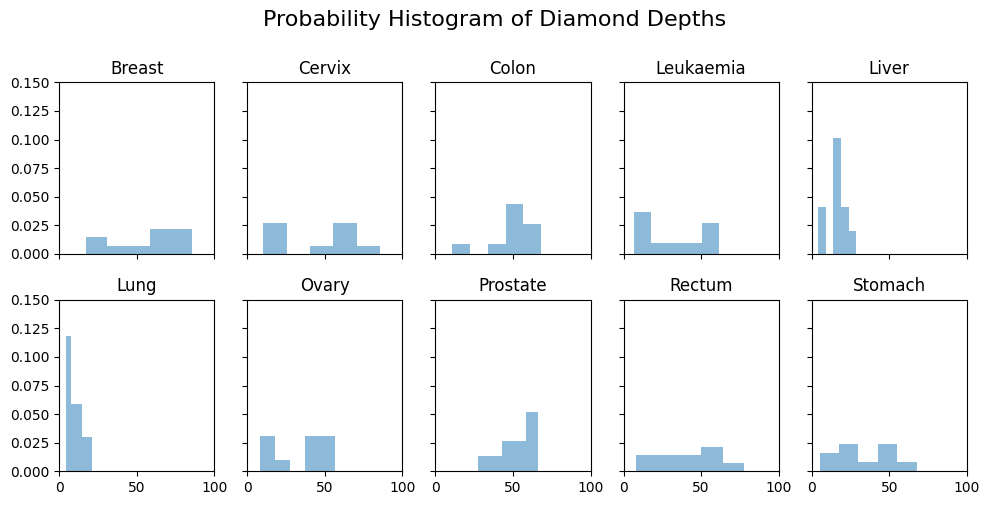

In [45]:
fig, axes = plt.subplots(2, 5, figsize=(10,5), dpi=100, sharex=True, sharey=True)
ycol=['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
for i, (ax, cut) in enumerate(zip(axes.flatten(), ycol)):
    x = arab[cut]
    ax.hist(x, alpha=0.5, bins=5, density=True, stacked=True, label=str(cut))
    ax.set_title(cut)

plt.suptitle('Probability Histogram of Diamond Depths', y=1, size=16)
ax.set_xlim(0,100); ax.set_ylim(0, 0.15);
plt.tight_layout();


<ipython-input-46-9a1fda77e45f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[0],x=arab[arab['Entity']=='Algeria'].iloc[:,3:13].values.ravel(),axlabel='Algeria')
<ipython-input-46-9a1fda77e45f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=axes[1],x=arab[arab['Entity']=='Jordan'

<Axes: xlabel='Qatar', ylabel='Density'>

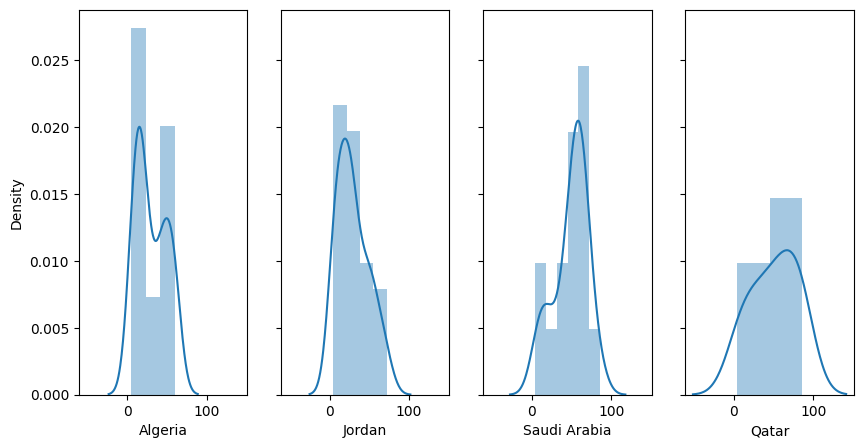

In [46]:
fig, axes = plt.subplots(1, 4, figsize=(10,5), dpi=100, sharex=True, sharey=True)
sns.distplot(ax=axes[0],x=arab[arab['Entity']=='Algeria'].iloc[:,3:13].values.ravel(),axlabel='Algeria')
sns.distplot(ax=axes[1],x=arab[arab['Entity']=='Jordan'].iloc[:,3:13].values.ravel(),axlabel='Jordan')
sns.distplot(ax=axes[2],x=arab[arab['Entity']=='Saudi Arabia'].iloc[:,3:13].values.ravel(),axlabel='Saudi Arabia')
sns.distplot(ax=axes[3],x=arab[arab['Entity']=='Qatar'].iloc[:,3:13].values.ravel(),axlabel='Qatar')

In [47]:
arab['Breast']

0    17.1
1    29.5
2    59.8
3    57.6
4    43.1
5    85.3
6    70.9
7    78.4
8    85.9
9    72.1
Name: Breast, dtype: float64

In [48]:
from scipy.stats import shapiro
xx=arab.iloc[:,3:13]
for i in xx.columns:
  stat, p = shapiro(xx[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))

  alpha = 0.05
  if p > alpha:
      print(f'{i} looks Gaussian (fail to reject H0)')
  else:
      print(f'{i} does not look Gaussian (reject H0)')

Statistics=0.919, p=0.347
Breast looks Gaussian (fail to reject H0)
Statistics=0.902, p=0.229
Cervix looks Gaussian (fail to reject H0)
Statistics=0.801, p=0.015
Colon does not look Gaussian (reject H0)
Statistics=0.888, p=0.163
Leukaemia looks Gaussian (fail to reject H0)
Statistics=0.942, p=0.578
Liver looks Gaussian (fail to reject H0)
Statistics=0.928, p=0.426
Lung looks Gaussian (fail to reject H0)
Statistics=0.929, p=0.440
Ovary looks Gaussian (fail to reject H0)
Statistics=0.907, p=0.259
Prostate looks Gaussian (fail to reject H0)
Statistics=0.978, p=0.951
Rectum looks Gaussian (fail to reject H0)
Statistics=0.977, p=0.944
Stomach looks Gaussian (fail to reject H0)


In [49]:
def calc(df):
  ycol=['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
  lst=[]  
  for i in df.iloc[:,3:13].columns:
    lst.append(df[i].mean(skipna=True))
  return lst,ycol

In [50]:
def error_bar(df):
  errors=[]
  for i in df.Entity.unique():
    df1=df[(df['Entity']==i)]
    for y in df1.Year.unique():
      df2=df1[df1['Year']==y].iloc[:,3:13]
      errors.append((st.stdev(df2.values.ravel()))/(m.sqrt(len(df2))))
      #errors.append((st.stdev(df2.values.ravel())))
  return errors

In [51]:
er=[]
sites=['Breast','Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
for i in sites:
  er.append(st.stdev(arab[i])/ m.sqrt(len(arab[i])))

In [52]:
demo=arab[arab['Entity']!='Qatar']
fig=px.box(demo,y=ycol,color='Entity', labels={'value':'Survival Percentage',"Entity":'Country','variable':'Cancer Site'},
           title="Cancer Survival Percentage Across Cancer Sites From 1999 Till 2009 For Arab Countries <br><sup>iCanViz Research and Development Project 2023 - DA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
fig.show()

In [53]:
#demo=arab[(arab['Entity']!='Qatar')&(arab['Year']==1999)]
demo=arab.iloc[:,3:13]
fig=px.box(demo,y=ycol,labels={'value':'Survival Percentage',"Entity":'Country','variable':'Cancer Site'},
           title="Cancer Survival Percentage Across Cancer Sites From 1999 Till 2009 For Arab Countries <br><sup>iCanViz Research and Development Project 2023 - DA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
fig.show()

In [54]:

val=st.stdev(arab[(arab['Year']==2009) & (arab['Entity']=='Qatar')][['Breast','Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']].values.ravel())

In [55]:
def error(df,country):
  er=[]
  sites=['Breast','Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
  for y in arab.Year.unique():
      er.append(st.stdev(arab[(arab['Year']==y)&(arab['Entity']==country)][sites].values.ravel()) / m.sqrt(len(arab[(arab['Year']==y) &(arab['Entity']==country) ][sites].values.ravel())))
  return er

In [56]:
def countries(countr):
  df=arab.copy()
  errors=error(df,'Jordan')
  duration=["1995-1999","2000-2004","2005-2009"]
  country={'Algeria':[], 'Jordan':[], 'Qatar':[], 'Saudi Arabia':[]}
  for y in arab.Year.unique():
    for i in arab.Entity.unique():
      result=arab[(arab['Entity']==i) & (arab['Year']==y)]['Avg_survival_per_year']
      if  result.empty ==True:
          country[i].append(None)
      else:
          country[i].append(result.iloc[0])
  print(er)
  demo=df[df['Entity']==countr]
  new=pd.DataFrame(country).T.reset_index()
  new.rename(columns={'index':'Entity',0:"1995-1999",1:"2000-2004",2:"2005-2009"},inplace=True)
  vals=new[new['Entity']==countr].values[0,1:]
  fig=px.bar(x=duration,y=vals,labels={'y':'Survival Percentage','x':'Duration'},text_auto=True,error_y=errors,
           title=f"Cancer Survival Percentages In {countr} Across All Cancer Sites 1995 - 2009",width=550,height=500)
  fig.show()

In [57]:
countries('Jordan')

[7.436203481765558, 8.230245034829359, 4.779837282214159, 6.665734101440823, 2.2468372833335697, 1.682986763003335, 5.45193543615476, 4.225164033633618, 6.7823430890642635, 6.3194022220811705]


In [58]:
xx1,yy1=calc(notarab)
fig = px.bar( x=xx1, y=yy1, orientation='h',labels={'y':'Cancer Site','x':'Survival Percentage'},error_x=er,
              title=f"Cancer Survival Percentage Per Cancer Site In The Non Arab World From 1999 Till 2009 <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

In [59]:
def calc1(df):
  count=list(df.Entity.unique())
  res=[]
  for i in count:
    res.append(df[df['Entity']==i]['Avg_surv_per_country'].iloc[0])
  return res,count

In [60]:
rr,cc=calc1(arab)
fig = px.bar( x=rr, y=cc, orientation='h',labels={'y':'Arab Country','x':'Survival Percentage'},
              title=f"Total Cancer Survival Percentage In The Arab World From 1999 Till 2009 <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

In [61]:
xx1,yy1= calc1(notarab)
xx,yy =calc1(arab)
fig = go.Figure(data=[
    go.Bar(name='Non Arab World', x=yy1, y=xx1),
    go.Bar(name='Arab World', x=yy, y=xx)
])
fig.update_layout(barmode='group',xaxis={'categoryorder': 'total descending'},title_text=f"Cancer Survival Percentage Per Cancer Site In The Non Arab World VS The Arab World From 1999 Till 2009 <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>",
                  yaxis=dict(title='Cancer Survival Percentage'))
fig.show()

In [62]:
def bar():
  ycol=['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']

  for i in ycol:
    fig = px.bar(arab,y=i,x='Year',color='Entity',labels={i:f"{i} Cancer","Entity":'Country'},
               title=f"Cancer Survival Percentage per Cancer Site Across Arab Countries for {i} Cancer <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Mahmoud Saber, Reema Maen</sup>", 
               text_auto=True)
    fig.update_xaxes(type='category')
    fig.show()

In [63]:
bar()

In [64]:
demo=arab[arab['Entity']!='Qatar']
errors=error_bar(demo)
fig = px.scatter(demo,y='Avg_survival_per_year',x='Entity',facet_col='Year',labels={'Avg_survival_per_year':'Average Survival Percentage',"Entity":'Country'},
               title="Average Cancer Survival Percentage Across Arab Countries From 1999 Till 2009  <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>", 
               error_y=errors)
fig.update_xaxes(type='category')
fig.show()

In [65]:
vals=demo.iloc[:,3:13].values

In [66]:
ans=[]
for i in range(len(arab)):
  ans.append(list(arab.values[i,3:13]))

In [67]:
ans=[]
for i in arab.Entity.unique():
  df=arab[arab['Entity']==i]
  for y in df.Year.unique():
    ans.append(list(df[df['Year']==y].iloc[0,3:13]))


In [68]:
fig = px.box(arab,y=ans,x='Entity',labels={'Avg_survival_per_year':'Average Survival Percentage',"Entity":'Country'},
               title="Cancer Survival Percentage Across Arab Countries From 1999 Till 2009  <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
fig.show()

In [69]:
ycol=['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
fig=px.box(demo,y=ycol,facet_col='Entity',labels={'value':'Survival Percentage',"Entity":'Country','variable':'Cancer Site'},
           title="Cancer Survival Percentage Across Cancer Sites From 1999 Till 2009 For Arab Countries <br><sup>iCanViz Research and Development Project 2023 - DA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
fig.show()

In [70]:
ycol=['Breast',	'Cervix','Colon','Leukaemia',	'Liver',	'Lung'	,'Ovary',	'Prostate',	'Rectum',	'Stomach']
fig=px.box(demo,y=ycol,color='Entity', labels={'value':'Survival Percentage',"Entity":'Country','variable':'Cancer Site'},
           title="Cancer Survival Percentage Across Cancer Sites From 1999 Till 2009 For Arab Countries <br><sup>iCanViz Research and Development Project 2023 - DA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>")
fig.show()

# DSUC2 - Cancer Survial Maps 

In [71]:
def calc1(df):
  count=list(df.Entity.unique())
  res=[]
  for i in count:
    res.append(df[df['Entity']==i]['Avg_surv_per_country'].iloc[0])
  return res,count

In [72]:
rr,cc=calc1(arab)
newar=pd.DataFrame(list(zip(rr,cc)), columns=['Average_Survival_Percentage','Country'])
newar['Code'] = list(arab.Code.unique())

In [73]:
rr1,cc1=calc1(notarab)
newnotar=pd.DataFrame(list(zip(rr1,cc1)), columns=['Average_Survival_Percentage','Country'])
newnotar['label']='Non Arab Country'
newnotar['Code'] = list(notarab.Code.unique())

In [74]:
new=pd.concat([newar,newnotar],axis=0)
new.fillna('Arab Country',inplace=True)

In [75]:
fig = px.scatter_geo(new, locations="Code",
                     hover_data=["Country"], size="Average_Survival_Percentage",
                     projection="natural earth",color='label')
fig.show()